<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li></ul></div>

# Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import os
from statsmodels.tsa.seasonal import seasonal_decompose
import glob
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [2]:
start_time = datetime.now()
all_csv = glob.glob(f'../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/**/*.csv', recursive=True)
end_time = datetime.now()
print(f'Loaded the paths of {len(all_csv)} files from disk. Took {end_time-start_time}')

Loaded the paths of 100 files from disk. Took 0:00:00.146074


In [3]:
df = pd.read_csv(all_csv[0])
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
df_indexed = df.set_index('timestamp')



X
 timestamp
2014-11-23 07:00:00     297.829102
2014-11-23 08:00:00     -16.734937
2014-11-23 09:00:00     418.295754
2014-11-23 10:00:00     457.428204
2014-11-23 11:00:00     311.510876
                          ...     
2015-01-21 07:00:00    8910.889559
2015-01-21 08:00:00    8130.658688
2015-01-21 09:00:00    8762.876253
2015-01-21 10:00:00    9070.204621
2015-01-21 11:00:00    8766.279151
Name: value, Length: 1421, dtype: float64

train
 timestamp
2014-11-23 07:00:00     297.829102
2014-11-23 08:00:00     -16.734937
2014-11-23 09:00:00     418.295754
2014-11-23 10:00:00     457.428204
2014-11-23 11:00:00     311.510876
                          ...     
2014-12-22 16:00:00    2688.053587
2014-12-22 17:00:00    2859.221568
2014-12-22 18:00:00    2952.338176
2014-12-22 19:00:00    2942.099738
2014-12-22 20:00:00    2855.897891
Name: value, Length: 710, dtype: float64 
test
 timestamp
2014-12-22 21:00:00    2859.888532
2014-12-22 22:00:00    3042.923252
2014-12-22 23:00:00    2789

predicted=5196.047187, expected=4287.993913
predicted=4205.685746, expected=4733.816899
predicted=4824.102101, expected=4741.213677
predicted=5011.289286, expected=4552.680306
predicted=4422.562612, expected=4063.191496
predicted=4097.791565, expected=5000.843830
predicted=5019.294306, expected=4407.820130
predicted=4667.751959, expected=4097.469597
predicted=3770.093699, expected=4680.490161
predicted=4859.074919, expected=4307.033199
predicted=4488.169975, expected=4393.887190
predicted=4179.994525, expected=4131.434596
predicted=4292.271052, expected=3872.919110
predicted=3888.027313, expected=4224.381080
predicted=4327.811668, expected=4414.224541
predicted=4523.819409, expected=4215.719960
predicted=4100.154626, expected=4206.192339
predicted=4117.679860, expected=4232.600165
predicted=4306.562332, expected=4256.151859
predicted=4274.638985, expected=4087.787014
predicted=4102.108215, expected=4063.664131
predicted=4066.918280, expected=3951.136679
predicted=4042.114671, expected=

predicted=5746.873254, expected=6388.535244
predicted=6355.694111, expected=5725.476777
predicted=5972.127464, expected=5926.575685
predicted=5609.375009, expected=5718.359656
predicted=5996.971172, expected=5957.449021
predicted=5889.367221, expected=5499.898863
predicted=5629.109127, expected=5904.549517
predicted=5796.746269, expected=5876.813300
predicted=6072.057887, expected=5431.152396
predicted=5313.735909, expected=5200.462431
predicted=5234.695958, expected=5646.724505
predicted=5823.786296, expected=4983.347552
predicted=5158.914724, expected=5667.172326
predicted=5462.933642, expected=5646.681408
predicted=5913.475319, expected=5629.287444
predicted=5362.441776, expected=5344.183141
predicted=5354.366820, expected=5821.773162
predicted=5798.895292, expected=5344.732712
predicted=5504.854347, expected=5134.265751
predicted=4973.564627, expected=5249.834903
predicted=5446.800327, expected=5030.161778
predicted=5165.332950, expected=5010.465334
predicted=4995.014584, expected=

predicted=7161.035597, expected=7030.659370
predicted=6908.929693, expected=7006.157109
predicted=7103.339109, expected=6663.131855
predicted=6689.110265, expected=7120.360765
predicted=7114.884120, expected=7025.300289
predicted=7180.625950, expected=7035.705725
predicted=6866.064598, expected=6709.027189
predicted=6764.198609, expected=6441.327605
predicted=6475.334637, expected=7288.297361
predicted=7381.741519, expected=7132.356115
predicted=7266.864358, expected=6668.944939
predicted=6368.298819, expected=6410.614798
predicted=6475.726969, expected=6671.351264
predicted=6866.200696, expected=6675.243881
predicted=6822.944305, expected=6178.040936
predicted=6137.640425, expected=6565.282772
predicted=6544.190848, expected=6624.167578
predicted=6830.286806, expected=6971.616669
predicted=6808.636818, expected=6302.310761
predicted=6313.760758, expected=7093.477841
predicted=6891.176440, expected=6807.650117
predicted=7088.042458, expected=6482.190756
predicted=6211.851668, expected=

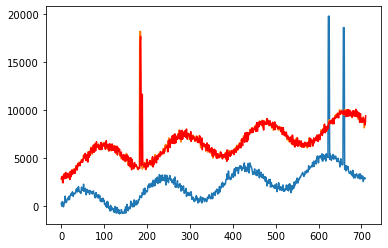

In [15]:
X = df_indexed.value
print("\n\nX\n",X)
size = int(len(X) * 0.5)
train, test = X[0:size], X[size:len(X)]
print("\ntrain\n",train,"\ntest\n",test)
history = [x for x in train]
predictions = list()
for t in range(len(test)):
 	model = ARIMA(history, order=(5,1,0))
 	model_fit = model.fit(disp=0)
 	output = model_fit.forecast()
 	yhat = output[0]
 	predictions.append(yhat)
 	obs = test.iloc[t]
 	history.append(obs)
 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
fig1 = plt.figure()
plt.plot(train.tolist())
plt.plot(test.tolist())
plt.plot(predictions, color='red')
plt.show()


In [17]:
output

(array([9373.75811867]),
 array([891.54068037]),
 array([[ 7626.37049439, 11121.14574296]]))

Processing index: 0 of 100
Mean: 4471.669226, StandardDeviation: 2925.391670
Test MSE: 0.068


ValueError: x and y must have same first dimension, but have shapes (710,) and (711,)

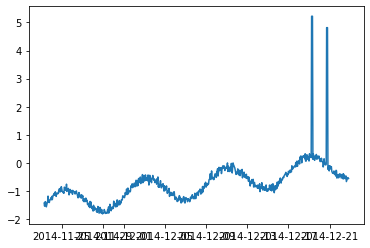

In [7]:
start_time = datetime.now() 
f1_plot = []
rmse_plot = []
precision_plot = []
recall_plot = []
for index,file in enumerate(all_csv):
    
    if index%10 == 0:
        print(f'Processing index: {index} of {len(all_csv)}')
    if index > 3:
         break
    
    fname = file.split("/")[5].replace('\\','').split(".")[0]
    df = pd.read_csv(file)
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
    df_indexed = df.set_index('timestamp')
    #print(df_indexed)
    
    # prepare data for standardization
    values = df_indexed.copy()
    values = values.drop(columns=['is_anomaly'],axis=1)
    #values = values.reshape((len(values), 1))
    
    # train the standardization
    scaler2 = StandardScaler()
    scaler2 = scaler2.fit(values)
    print('Mean: %f, StandardDeviation: %f' % (scaler2.mean_, sqrt(scaler2.var_)))
    # standardize the dataset
    standardaized = scaler2.transform(values)
    
    df['std_value'] = standardaized
    df_indexed['std_value'] = standardaized
    
    # split dataset
    X = df.std_value
    size = int(len(X)*0.5)
    train, test = X[0:size], X[size:len(X)]
    
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test.iloc[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    
    #plot results
    #plt.rcParams.update({'figure.figsize': (10,10)})
    #plt.plot_date(df['timestamp'][size:],df['std_value'][size:])
    plt.plot_date(df['timestamp'][:size],train,fmt="-")
    plt.plot_date(df['timestamp'][:size+1],test,color="orange",fmt="-")
    plt.plot_date(df['timestamp'][size:],predictions,color="red",fmt="-")
    plt.gcf().autofmt_xdate()
    plt.savefig("./ARIMAoutput/" + fname +"arima-5-1-0")
    plt.show()
    
    arimaprediction = pd.concat([df['timestamp'][size:],pd.Series(predictions)],axis=1)
    arimaprediction.rename(columns={0:'value'},inplace=True)
    arimaprediction = arimaprediction.set_index('timestamp')
    checkingmatrix = df.set_index('timestamp').join(arimaprediction, on='timestamp',how='inner',lsuffix='_data',rsuffix='_prediction')
    
end_time=datetime.now()
print(f"ARIMA Modelling and Anomaly Analysis of Yahoo S5 A2 Benchmark processing complete. Time taken:{end_time-start_time}")
plt.plot(f1_plot)
print(f"Average F1 score over {index} runs is = {sum(f1_plot)/len(f1_plot)}")

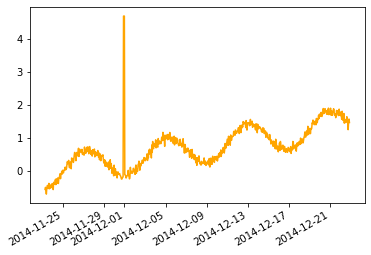

In [10]:
plt.plot_date(df['timestamp'][:size+1],test,color="orange",fmt="-")
plt.gcf().autofmt_xdate()

In [14]:
len(model_fit.predict())

1419

In [12]:
test

710    -0.550962
711    -0.488395
712    -0.574916
713    -0.692159
714    -0.514973
          ...   
1416    1.517479
1417    1.250769
1418    1.466883
1419    1.571938
1420    1.468046
Name: std_value, Length: 711, dtype: float64